# EDA dataset Grammy

### This EDA aims to clean and analyze the dataframe: 'the_grammy_awards'. We obtained it from the Kaggle website, and this DataFrame is stored locally in a PostgreSQL database.

Import of the necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect
from dotenv import load_dotenv
import os


Get connection to data base

In [10]:
load_dotenv()

localhost = os.getenv('LOCALHOST')
port = os.getenv('PORT')
nameDB = os.getenv('DB_NAME')
userDB = os.getenv('DB_USER')
passDB = os.getenv('DB_PASS')

try:
    engine = create_engine(f'postgresql+psycopg2://{userDB}:{passDB}@{localhost}:{port}/{nameDB}')
    inspector = inspect(engine)
    
    connection = engine.connect()
    print("Successfully connected to the database.")
    
    connection.close()

except Exception as e:
    print(f"Failed to connect to the database: {e}")

Successfully connected to the database.


We retrieve the data from the database and then print them to take a look at the data types and columns it contains.

In [3]:
dataframe = 'grammy_awards'  

df = pd.read_sql_table(dataframe, engine)

print(df.head())
print(df.info())

   year                              title               published_at  \
0  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
1  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
2  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
3  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
4  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   

                  updated_at            category     nominee         artist  \
0  2020-05-19T05:10:28-07:00  Record Of The Year     Bad Guy  Billie Eilish   
1  2020-05-19T05:10:28-07:00  Record Of The Year     Hey, Ma       Bon Iver   
2  2020-05-19T05:10:28-07:00  Record Of The Year     7 rings  Ariana Grande   
3  2020-05-19T05:10:28-07:00  Record Of The Year  Hard Place         H.E.R.   
4  2020-05-19T05:10:28-07:00  Record Of The Year        Talk         Khalid   

                                             workers  \
0  Finneas O'Connell, producer

Now we are going to check the data type of each column.

In [4]:
print(df.dtypes)

year             int64
title           object
published_at    object
updated_at      object
category        object
nominee         object
artist          object
workers         object
img             object
winner            bool
dtype: object


After reviewing the data types in each column, we noticed that the 'published_at' and 'updated_at' columns are classified as "object," which doesn't make sense given the nature of the data they handle. These columns will be converted to the "Date" type, which is more appropriate for the values they contain.

In [5]:
df['published_at'] = pd.to_datetime(df['published_at'], utc=True)
df['updated_at'] = pd.to_datetime(df['updated_at'], utc=True)
print(df.dtypes)

year                          int64
title                        object
published_at    datetime64[ns, UTC]
updated_at      datetime64[ns, UTC]
category                     object
nominee                      object
artist                       object
workers                      object
img                          object
winner                         bool
dtype: object


We delete the 'img' column since it only contains links that we will not access, and it doesn't provide any value or meaning to the dataframe.

In [6]:
df = df.drop(columns="img")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   year          4810 non-null   int64              
 1   title         4810 non-null   object             
 2   published_at  4810 non-null   datetime64[ns, UTC]
 3   updated_at    4810 non-null   datetime64[ns, UTC]
 4   category      4810 non-null   object             
 5   nominee       4804 non-null   object             
 6   artist        2970 non-null   object             
 7   workers       2620 non-null   object             
 8   winner        4810 non-null   bool               
dtypes: bool(1), datetime64[ns, UTC](2), int64(1), object(5)
memory usage: 305.5+ KB
None


Now let see how many null values we have

In [7]:
null_data = df.isnull().sum()
print(null_data)

year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist          1840
workers         2190
winner             0
dtype: int64


We delete the rows that contain null values in the 'artist' column because they are important data for the analysis, and without them, there is no value. This will help keep this column free of nulls to create better graphs during the analysis.

In [8]:
df = df.dropna(subset=["artist"])
null_data = df.isnull().sum()
print(null_data)

year               0
title              0
published_at       0
updated_at         0
category           0
nominee            0
artist             0
workers         2004
winner             0
dtype: int64


Seeing that the remaining Null data is in the "worker" column, we change them to "Unknown" to avoid having more Null data and to be able to use them in the analyses.

In [9]:
df['workers'].fillna('Unknown', inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2970 entries, 0 to 4803
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   year          2970 non-null   int64              
 1   title         2970 non-null   object             
 2   published_at  2970 non-null   datetime64[ns, UTC]
 3   updated_at    2970 non-null   datetime64[ns, UTC]
 4   category      2970 non-null   object             
 5   nominee       2970 non-null   object             
 6   artist        2970 non-null   object             
 7   workers       2970 non-null   object             
 8   winner        2970 non-null   bool               
dtypes: bool(1), datetime64[ns, UTC](2), int64(1), object(5)
memory usage: 211.7+ KB
None


/tmp/ipykernel_240919/41693599.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workers'].fillna('Unknown', inplace=True)


## In this block of code, we perform the update of the cleaned data to the database.

In [10]:
try:
    df.to_sql('grammy_awards', engine, if_exists='replace', index=False)

    print(f"Table 'grammy_awards' updated.")

except Exception as e:
    print(f"Error uploading data: {e}")

finally:
    engine.dispose()

Table 'grammy_awards' updated.


# Visualizations.

## Pie charts with the 5 most nominated categories at the Grammys

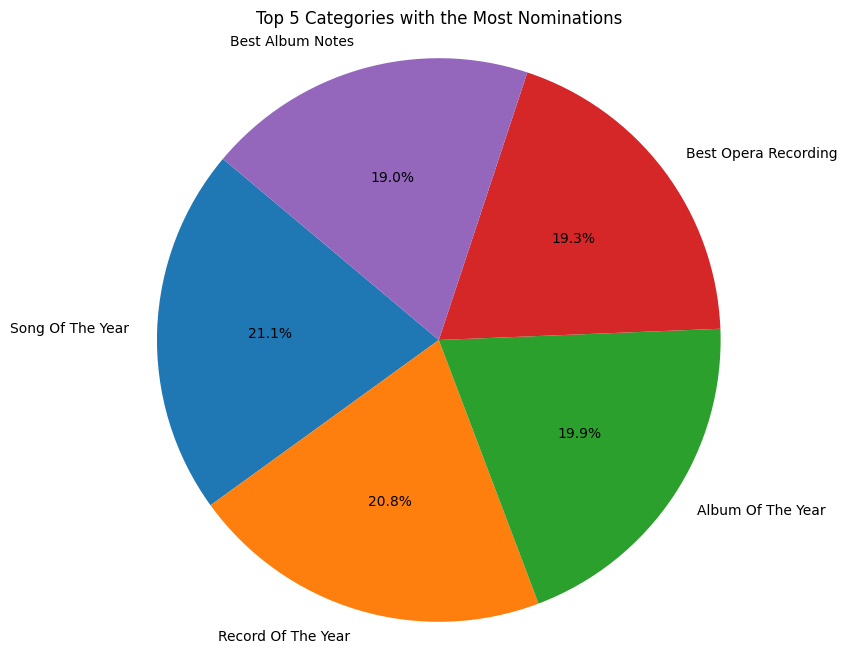

In [15]:
top_categories = df['category'].value_counts().head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Categories with the Most Nominations')
plt.axis('equal')
plt.show()


## Bar chart with the 10 most nominated artists at the Grammys

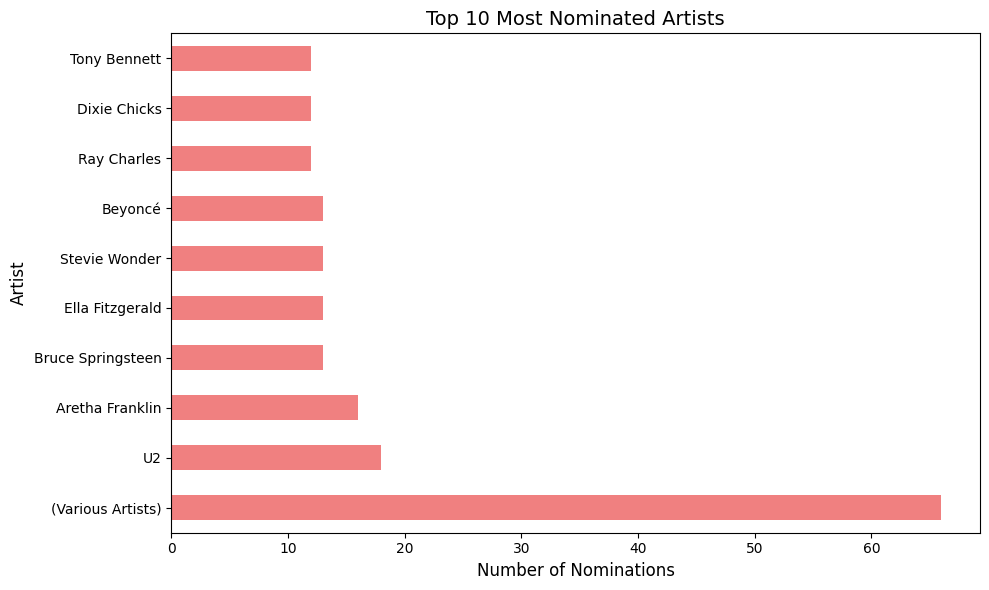

In [17]:
artist_counts = df['artist'].value_counts().head(10)


plt.figure(figsize=(10, 6))
artist_counts.plot(kind='barh', color='lightcoral')

plt.title('Top 10 Most Nominated Artists', fontsize=14)
plt.xlabel('Number of Nominations', fontsize=12)
plt.ylabel('Artist', fontsize=12)

plt.tight_layout()
plt.show()